# EEG feature plotting for different brain areas over time (across subjects)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import seaborn as sns
import matplotlib

import os
import random
import scipy

from scipy.stats import gaussian_kde
from utils import *
from eeg_feature_extraction.eeg_utils import *

random.seed(42)
sns.set_style("white")

In [2]:
#ner_labels_normal_reading = pd.read_csv('./task_materials/ner_labels_normal_reading.tsv', sep = '\t', encoding='latin-1',
#                                        header=None, names=['Word', 'NER'])

In [3]:
files_task2 = get_matfiles('task2')
files_task3 = get_matfiles('task3')

data_task2_sbj1 = io.loadmat(files_task2[0], squeeze_me=True, struct_as_record=False)['sentenceData']
data_task3_sbj1 = io.loadmat(files_task3[0], squeeze_me=True, struct_as_record=False)['sentenceData']

sent_lens_task2_sbj1 = [len(sent.word) for sent in data_task2_sbj1]
sent_lens_task3_sbj1 = [len(sent.word) for sent in data_task3_sbj1]

In [4]:
relation_labels_task2 = pd.read_csv('./task_materials/relations_labels_task2.csv', sep = ',')
relation_labels_task3 = pd.read_csv('./task_materials/relations_labels_task3.csv', sep = ';')

In [5]:
# get indices of sentences with relation labels
indices_relations_task2 = [idx for idx, relation in enumerate(relation_labels_task2.relation_types.values) if relation != 'NO-RELATION'] 
indices_no_relations_task2 = [idx for idx, relation in enumerate(relation_labels_task2.relation_types.values) if relation == 'NO-RELATION'] 
assert len(indices_relations_task2) + len(indices_no_relations_task2) == len(data_task2_sbj1)

indices_relations_task3 = [idx for idx, relation in enumerate(relation_labels_task3['relation-type'].values) if relation != 'CONTROL'] 
indices_no_relations_task3 = [idx for idx, relation in enumerate(relation_labels_task3['relation-type'].values) if relation == 'CONTROL'] 
assert len(indices_relations_task3) + len(indices_no_relations_task3) == len(data_task3_sbj1)

In [6]:
eeg_feats_all_sbjs_task2 = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg') for i in range(12)])
eeg_feats_all_sbjs_task3 = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg') for i in range(12)])

In [7]:
#NOTE: for now, don't execute this cell (wait until we have got NER labels on word level)

#extract EEG features for NER labels on word level
#eeg_feats_all_sbjs_task2_ner = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg', 
#                                                split_words=True, ner_indices=word_indices_ne_task2) 
#                                                for i in range(12)])

#eeg_feats_all_sbjs_task2_no_ner = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg',
#                                                split_words=True, ner_indices=word_indices_non_ne_task2) 
#                                                for i in range(12)])

In [8]:
# Extract EEG features for sentences with or without relations respectively

eeg_feats_all_sbjs_task2_relations = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg', 
                                                split_sents=True, relation_indices=indices_relations_task2) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task2_no_relations = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg',
                                                split_sents=True, relation_indices=indices_no_relations_task2) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task3_relations = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg', 
                                                split_sents=True, relation_indices=indices_relations_task3) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task3_no_relations = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg',
                                                split_sents=True, relation_indices=indices_no_relations_task3) 
                                                for i in range(12)])

In [9]:
eeg_data_per_sent_task2_sbj1 = reshape_into_tensor(eeg_feats_all_sbjs_task2, sent_lens_task2_sbj1)
eeg_data_per_sent_task3_sbj1 = reshape_into_tensor(eeg_feats_all_sbjs_task3, sent_lens_task3_sbj1)

In [10]:
eeg_data_per_sent_task2_sbj1_rel = reshape_into_tensor(eeg_feats_all_sbjs_task2_relations, sent_lens_task2_sbj1)
eeg_data_per_sent_task2_sbj1_no_rel = reshape_into_tensor(eeg_feats_all_sbjs_task2_no_relations, sent_lens_task2_sbj1)

eeg_data_per_sent_task3_sbj1_rel = reshape_into_tensor(eeg_feats_all_sbjs_task3_relations, sent_lens_task3_sbj1)
eeg_data_per_sent_task3_sbj1_no_rel = reshape_into_tensor(eeg_feats_all_sbjs_task3_no_relations, sent_lens_task3_sbj1)

In [11]:
path = os.getcwd() + '\\eeg_feature_extraction\\' + '\\important_eeg_features\\'
files = [os.path.join(path, file) for file in os.listdir(path)]
eeg_locs_all_freqs = [np.loadtxt(file, dtype=int) for file in files if not file.endswith('.ipynb_checkpoints')]
eeg_locs_alpha_freqs = eeg_locs_all_freqs[:4]
eeg_locs_beta_freqs = eeg_locs_all_freqs[4:8]
eeg_locs_gamma_freqs = eeg_locs_all_freqs[8:12]
eeg_locs_theta_freqs = eeg_locs_all_freqs[12:16]

In [12]:
# important variables for plotting and statistical analyses
eeg_electrodes_all = np.array(['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E15', 'E16', 'E18', 'E19', 'E20', 'E22', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E64', 'E65', 'E66', 'E67', 'E69', 'E70', 'E71', 'E72', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E89', 'E90', 'E91', 'E92', 'E93', 'E95', 'E96', 'E97', 'E98', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E108', 'E109', 'E110', 'E111', 'E112', 'E114', 'E115', 'E116', 'E117', 'E118', 'E120', 'E121', 'E122', 'E123', 'E124', 'Cz'])

temporal_electrodes_alpha = ['E38', 'E43', 'E120', 'E121']
temporal_electrodes_beta = ['E38', 'E43', 'E57', 'E121']
temporal_electrodes_gamma = ['E38', 'E43', 'E44', 'E121']
temporal_electrodes_theta = ['E38', 'E43', 'E114', 'E120', 'E121']

frontoparietal_electrodes_alpha = ['E26', 'E30', 'E54']
frontoparietal_electrodes_beta = ['E2', 'E12', 'E26', 'E30' ]
frontoparietal_electrodes_gamma = ['E2', 'E26', 'E31']
frontoparietal_electrodes_theta = ['E4', 'E5', 'E118']

et_features = ['FFD', 'GD', 'GPT', 'TRT']

## $\alpha$-frequency domain

In [27]:
## Temporal Cortex ##
temporal_electrodes_alpha_all, temporal_indices_alpha_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_alpha_freqs, 
                                                                                           temporal_electrodes_alpha)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_alpha_all, frontoparietal_indices_alpha_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                       eeg_locs_alpha_freqs, 
                                                                                                       frontoparietal_electrodes_alpha)

In [14]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_alpha_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_alpha_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.5))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

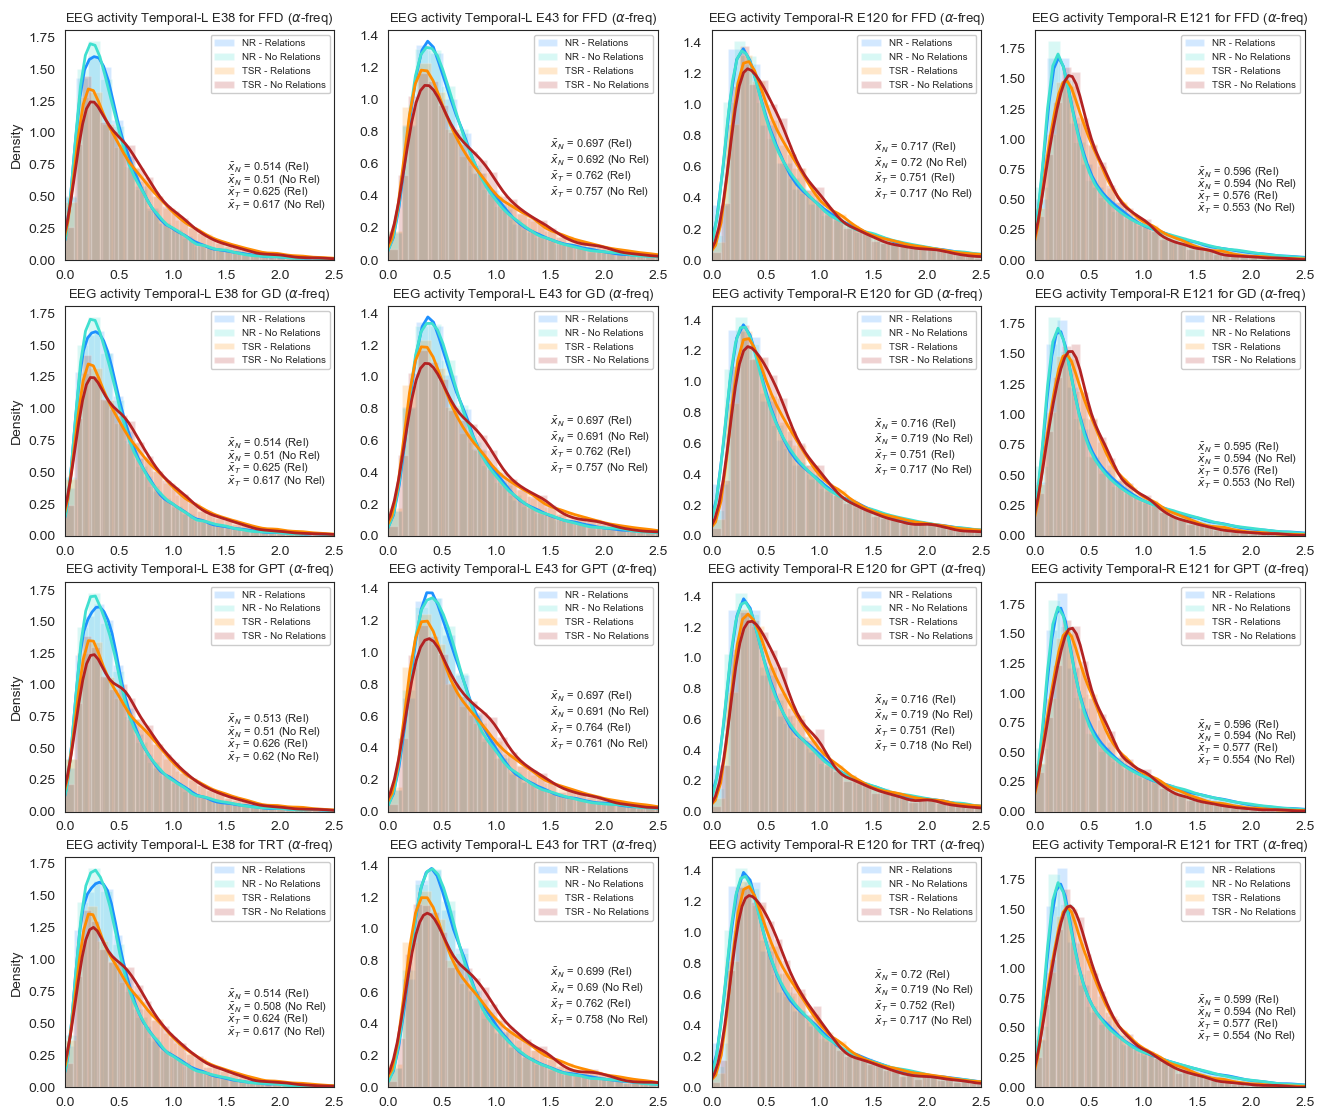

<Figure size 432x288 with 0 Axes>

In [28]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_alpha_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_alpha_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_alpha_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_alpha_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.7), fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.6), fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.5), fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.4), fontsize=8)
        if j < 2:
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[i]), fontsize=9.5)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[i]), fontsize=9.5)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

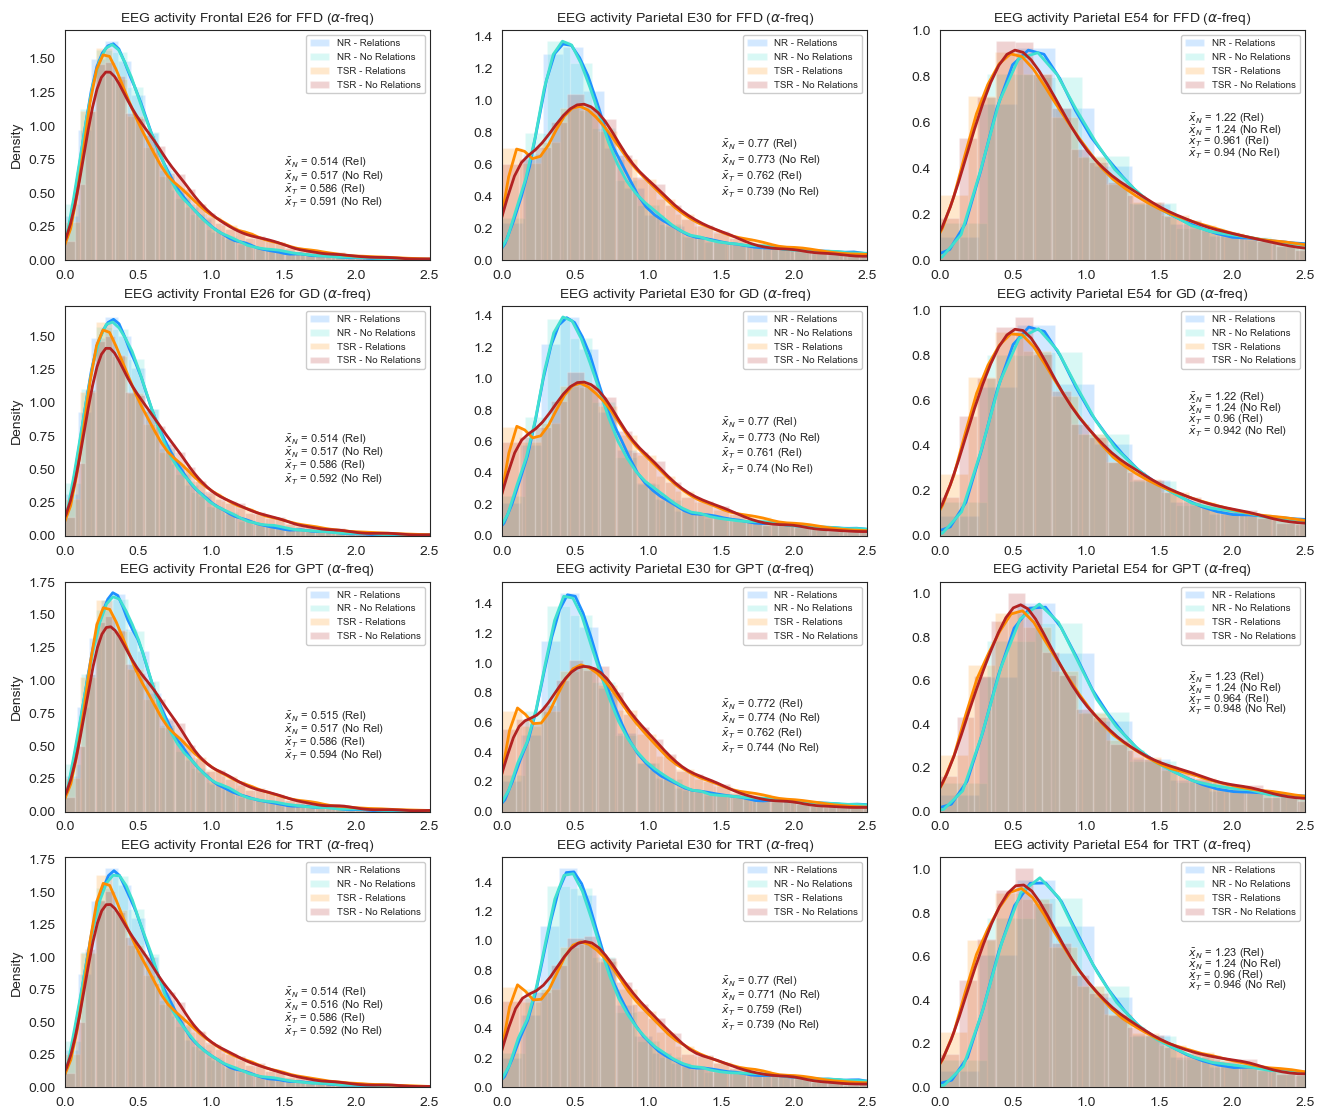

<Figure size 432x288 with 0 Axes>

In [29]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 3, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_alpha_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_alpha_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_alpha_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_alpha_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        pos = [(1.7, 0.6), (1.7, 0.55), (1.7, 0.5), (1.7, 0.45)] if j == 2 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[0], fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[1], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[2], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[3], fontsize=8)
        if j == 0:
            axes[i][j].set_title(r'EEG activity Frontal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_features[i]), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Parietal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_features[i]), fontsize = 10)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

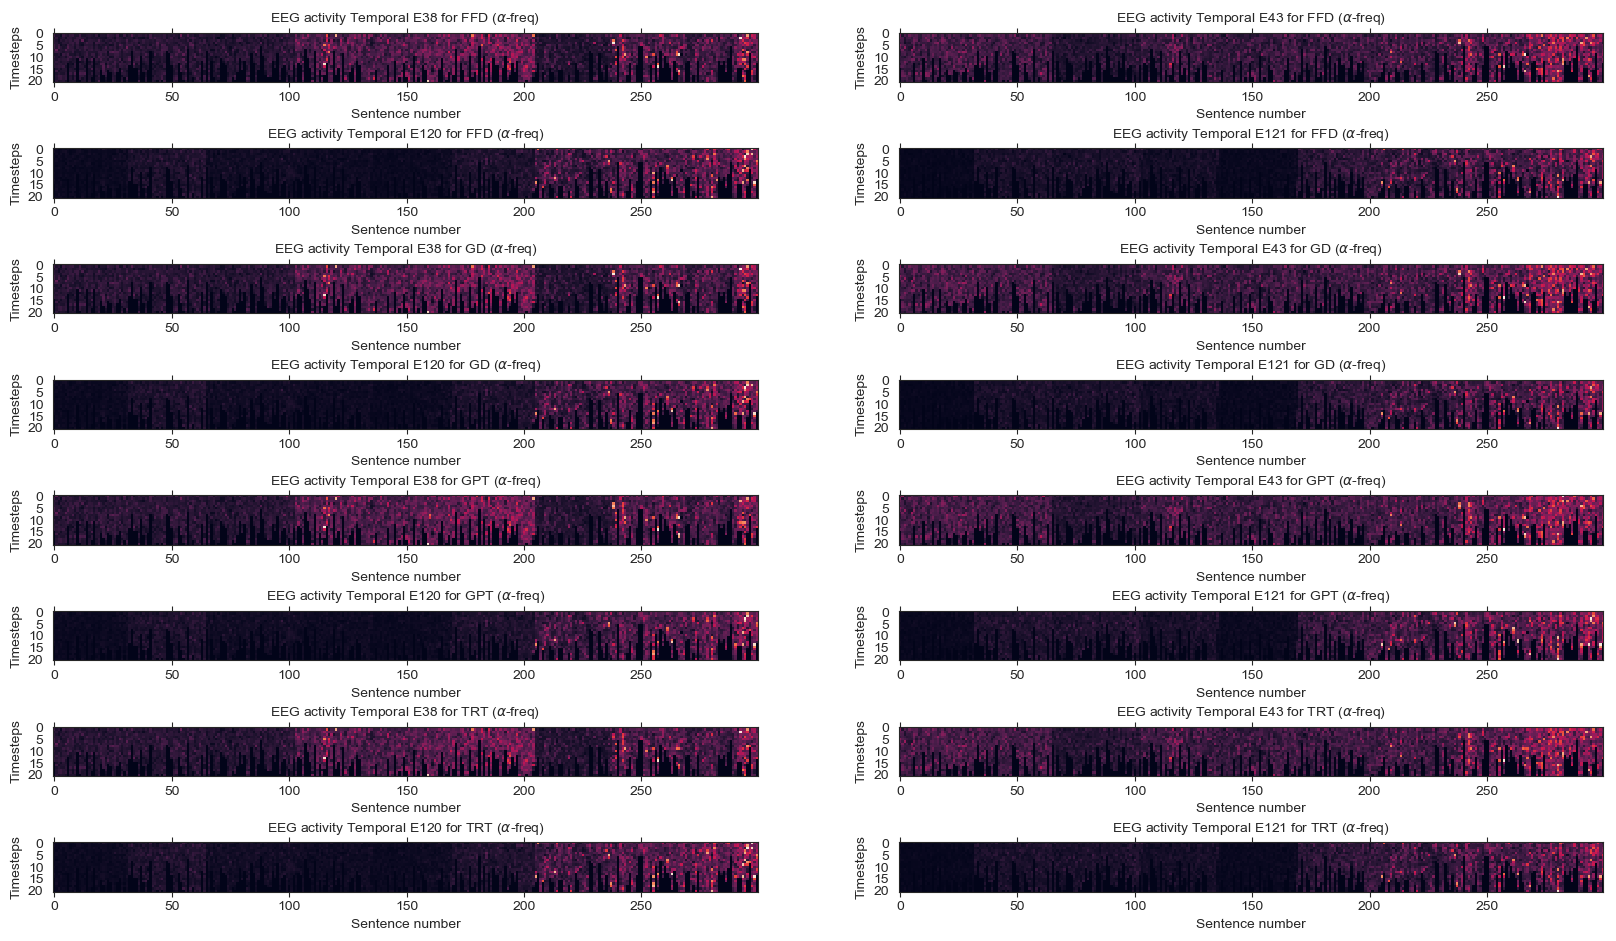

<Figure size 432x288 with 0 Axes>

In [30]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(20, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_alpha_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[et_feat_idx]), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/alpha_activity_temporal_heatmap_sbj1_task2')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

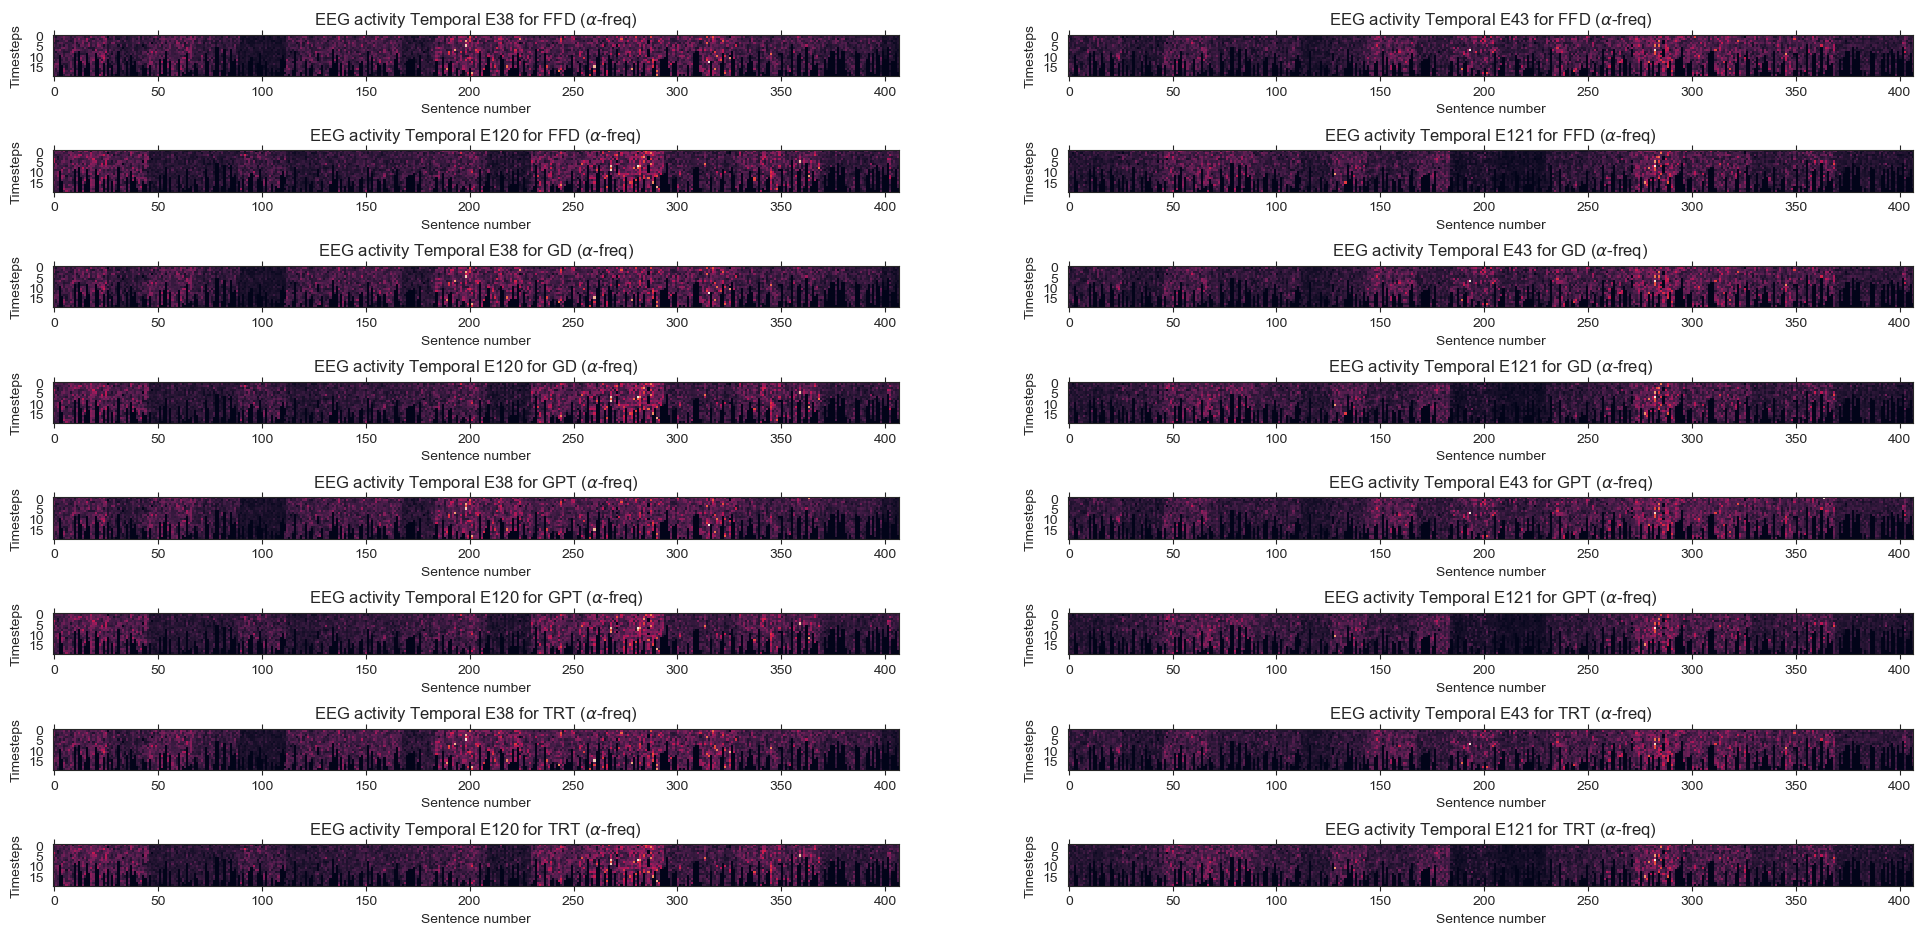

<Figure size 432x288 with 0 Axes>

In [31]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(24, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_alpha_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[et_feat_idx]), fontsize=12)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/alpha_activity_temporal_heatmap_sbj1_task3')
plt.show()
plt.clf()

## $\beta$-frequency domain

In [32]:
## Temporal Cortex ##
temporal_electrodes_beta_all, temporal_indices_beta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                         eeg_locs_beta_freqs, 
                                                                                         temporal_electrodes_beta, 
                                                                                         k=40)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_beta_all, frontoparietal_indices_beta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                     eeg_locs_beta_freqs, 
                                                                                                     frontoparietal_electrodes_beta, 
                                                                                                     k=40)

In [33]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_beta_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_beta_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_beta_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_beta_all[feat]].mean()), (1.8, 0.45))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/beta_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

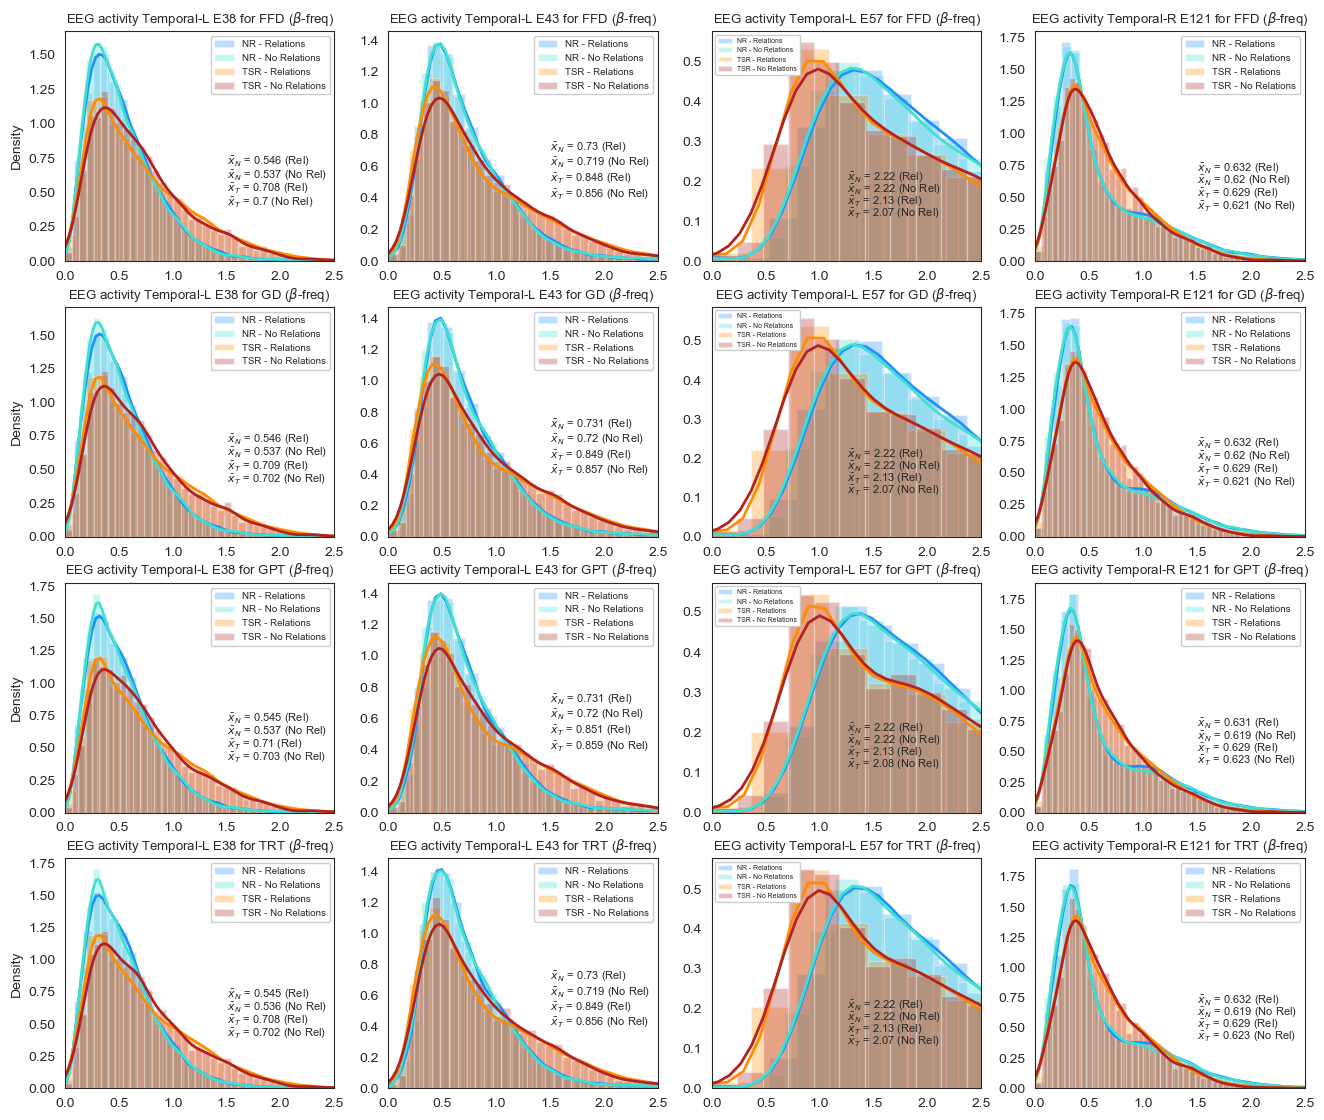

<Figure size 432x288 with 0 Axes>

In [35]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_beta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_beta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_beta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_beta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        pos = [(1.25, 0.2), (1.25, 0.17), (1.25, 0.14), (1.25, 0.11)] if j == 2 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_beta_all[feat]].mean()), pos[0], fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_beta_all[feat]].mean()), pos[1], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_beta_all[feat]].mean()), pos[2], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_beta_all[feat]].mean()), pos[3], fontsize=8)
        if j < 3:
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[i]), fontsize=9.5)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[i]), fontsize=9.5)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        loc = 'upper left' if j == 2 else 'upper right'
        size = {'size': 5} if j == 2 else {'size': 7}
        axes[i][j].legend(fancybox=True, framealpha=1, loc=loc, prop=size)
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

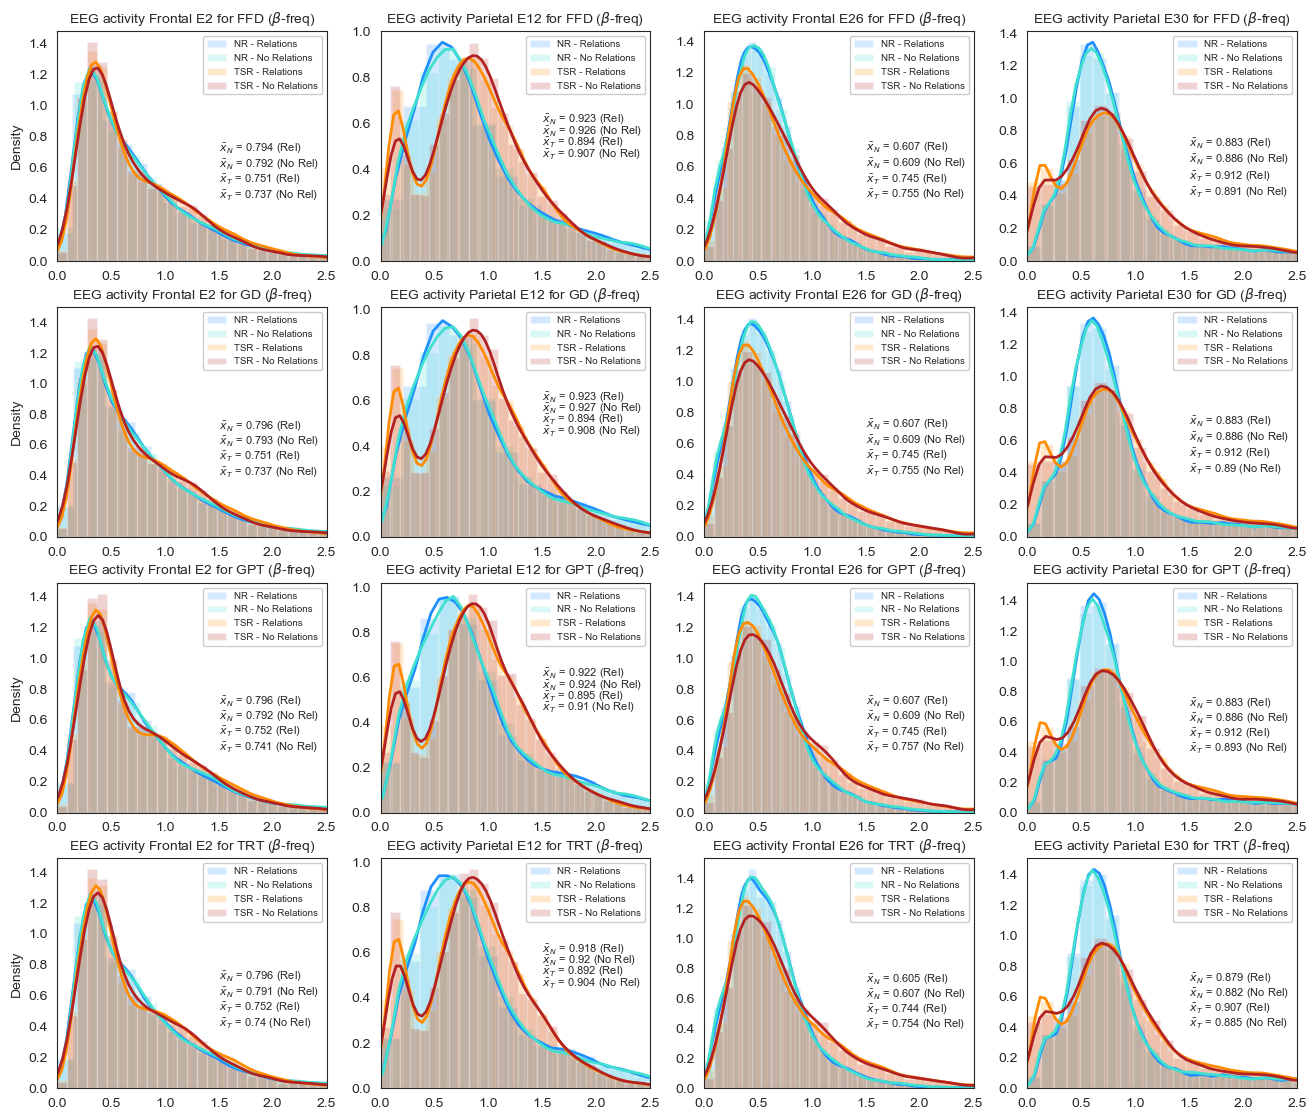

<Figure size 432x288 with 0 Axes>

In [36]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_beta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_beta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_beta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_beta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        pos = [(1.5, 0.6), (1.5, 0.55), (1.5, 0.5), (1.5, 0.45)] if j == 1 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[0], fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[1], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[2], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[3], fontsize=8)
        if j == 0 or j == 2:
            axes[i][j].set_title(r'EEG activity Frontal {} for {} ($\beta$-freq)'.format(frontoparietal_electrodes_beta_all[feat], et_features[i]), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Parietal {} for {} ($\beta$-freq)'.format(frontoparietal_electrodes_beta_all[feat], et_features[i]), fontsize = 10)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

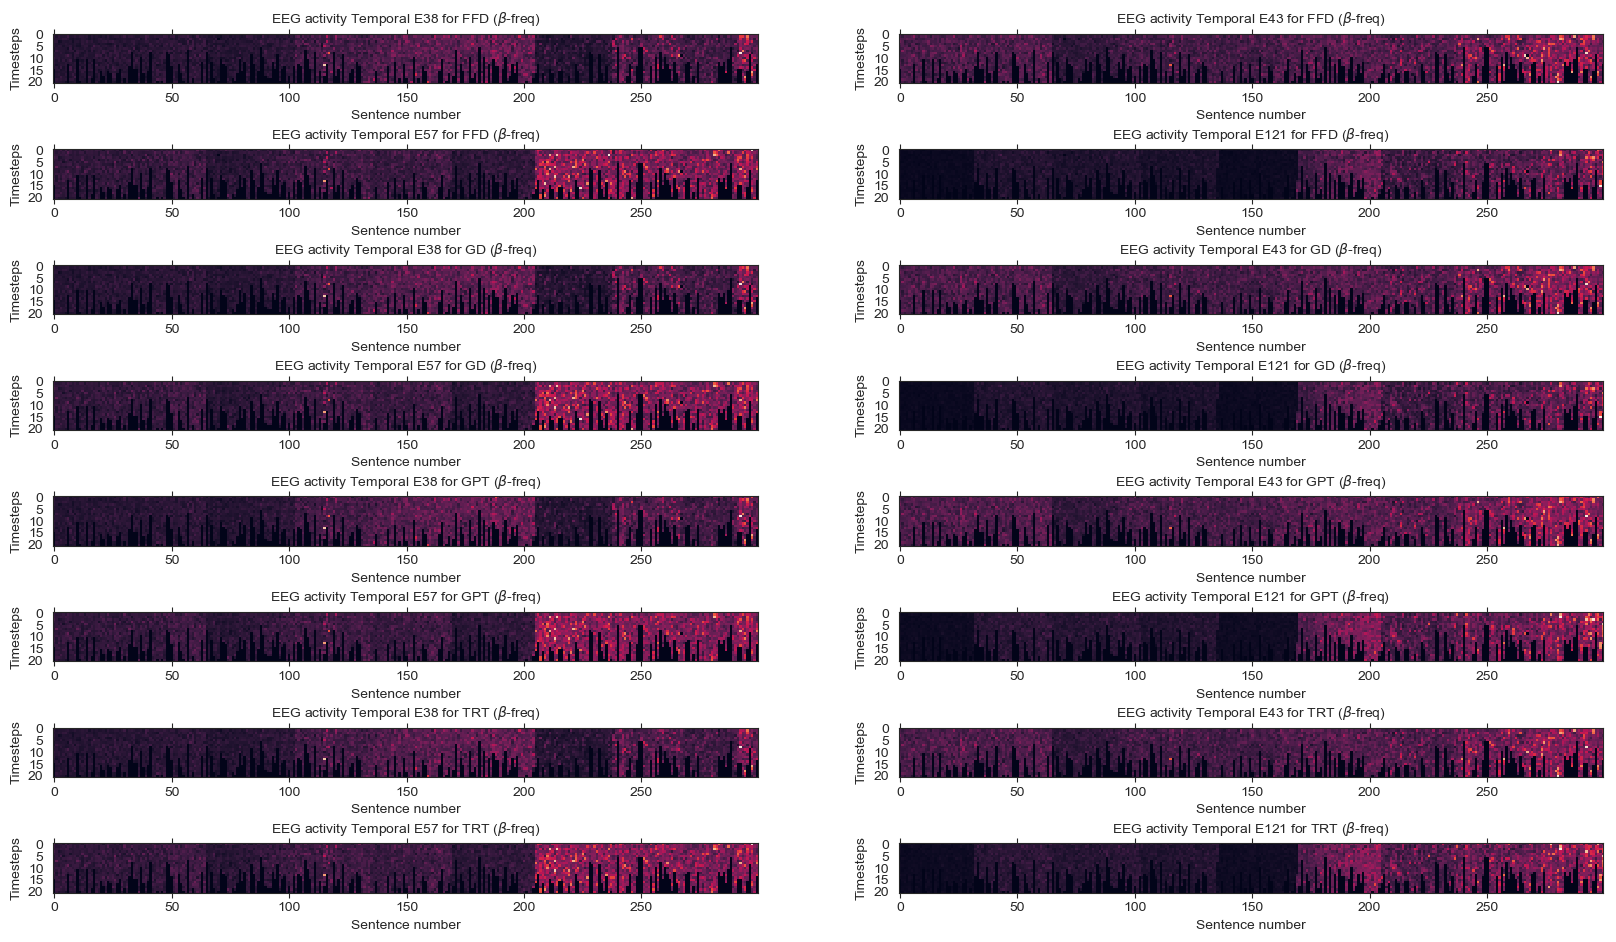

<Figure size 432x288 with 0 Axes>

In [37]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(20, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_beta_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[et_feat_idx]), fontsize=10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/beta_activity_temporal_heatmap_sbj1_task2')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

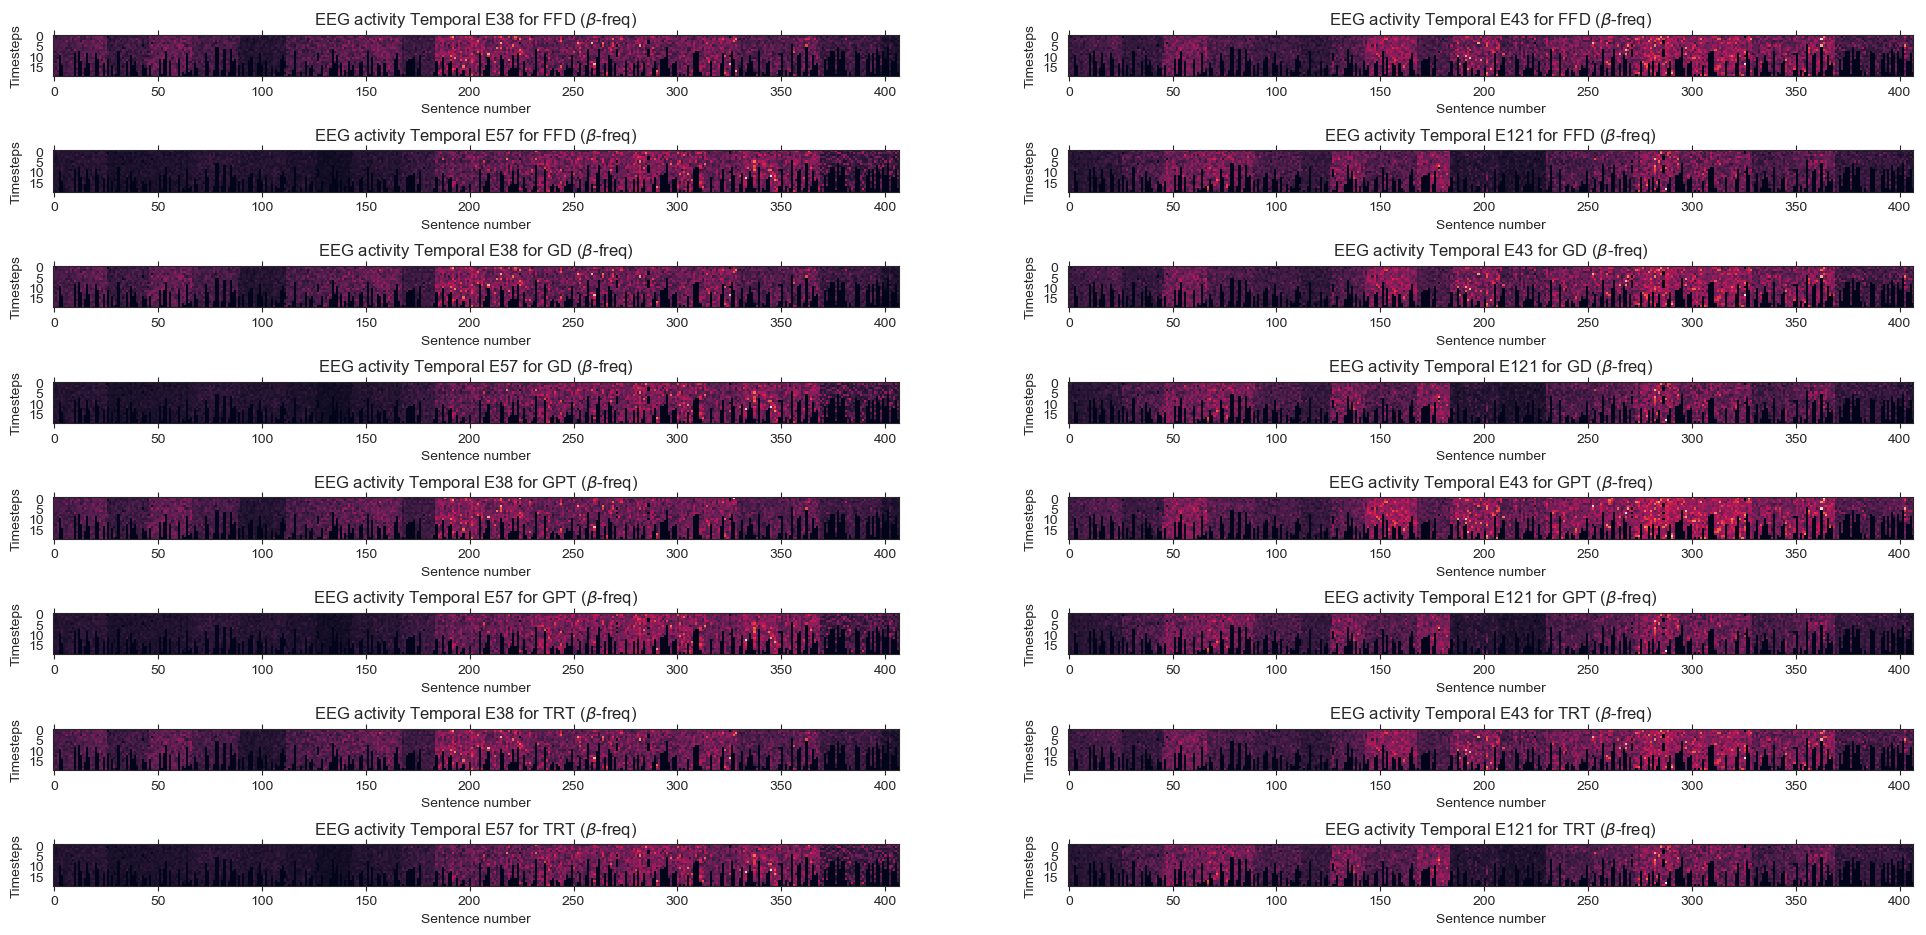

<Figure size 432x288 with 0 Axes>

In [38]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(24, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_beta_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[et_feat_idx]), fontsize=12)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/beta_activity_temporal_heatmap_sbj1_task3')
plt.show()
plt.clf()

## $\gamma$-frequency domain

In [39]:
## Temporal Cortex ##
temporal_electrodes_gamma_all, temporal_indices_gamma_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_gamma_freqs, 
                                                                                           temporal_electrodes_gamma, 
                                                                                           k=80)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_gamma_all, frontoparietal_indices_gamma_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                       eeg_locs_gamma_freqs, 
                                                                                                       frontoparietal_electrodes_gamma, 
                                                                                                       k=80)

In [40]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_gamma_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_gamma_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_gamma_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_gamma_all[feat]].mean()), (1.8, 0.45))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[i]), fontsize=10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/gamma_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

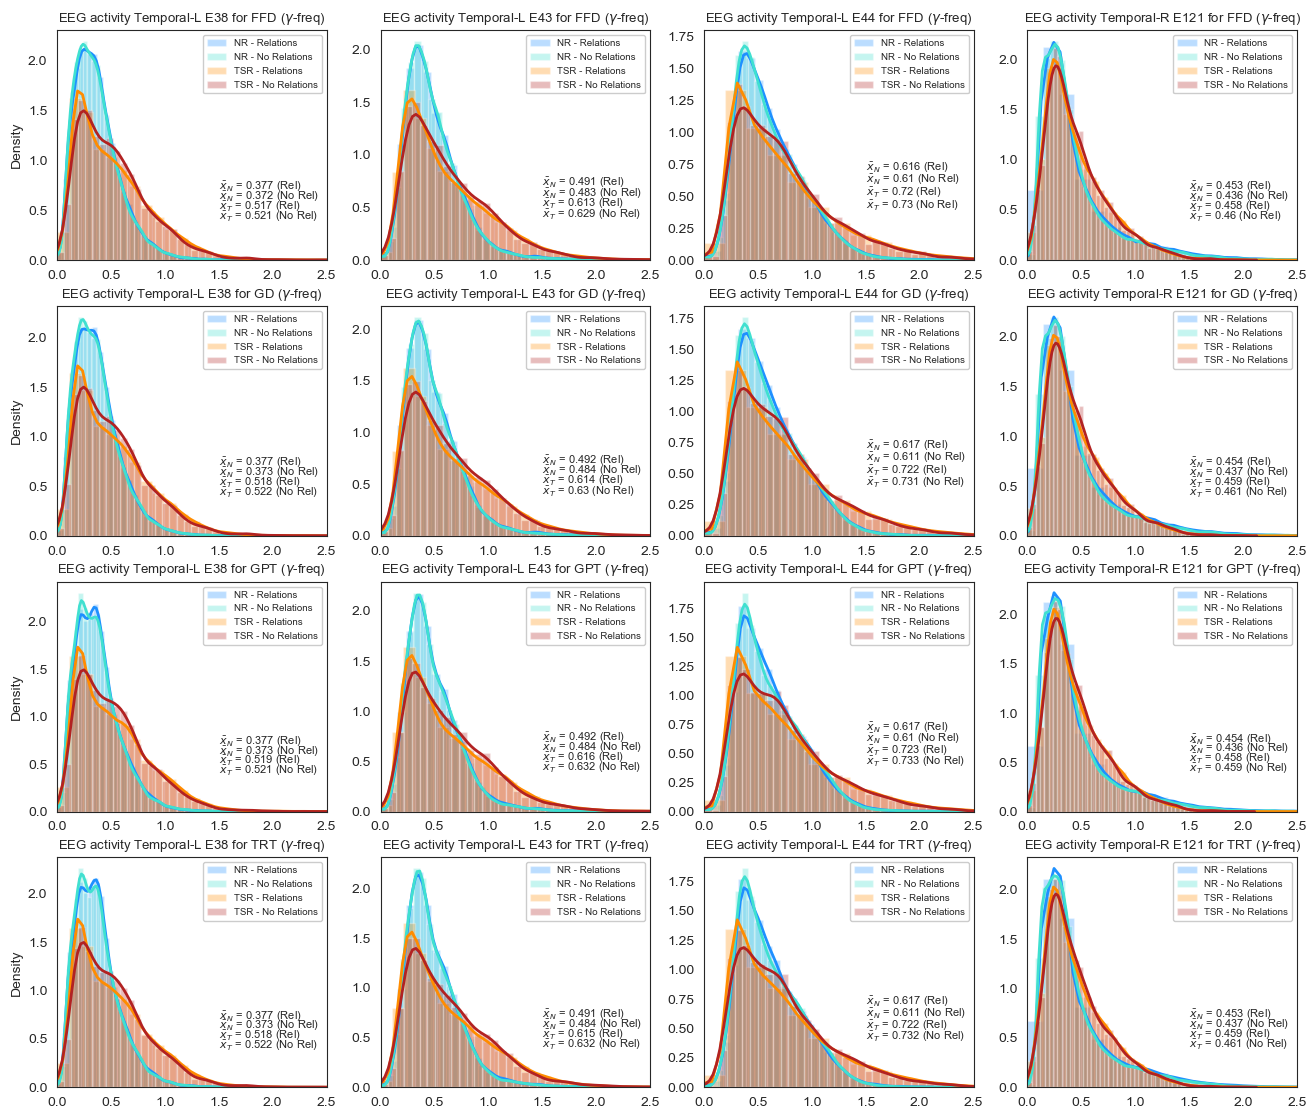

<Figure size 432x288 with 0 Axes>

In [52]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_gamma_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_gamma_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_gamma_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_gamma_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.7), fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.6), fontsize=8)      
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.5), fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.4), fontsize=8)
        if j < 3:
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[i]), fontsize=9.5)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[i]), fontsize=9.5)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

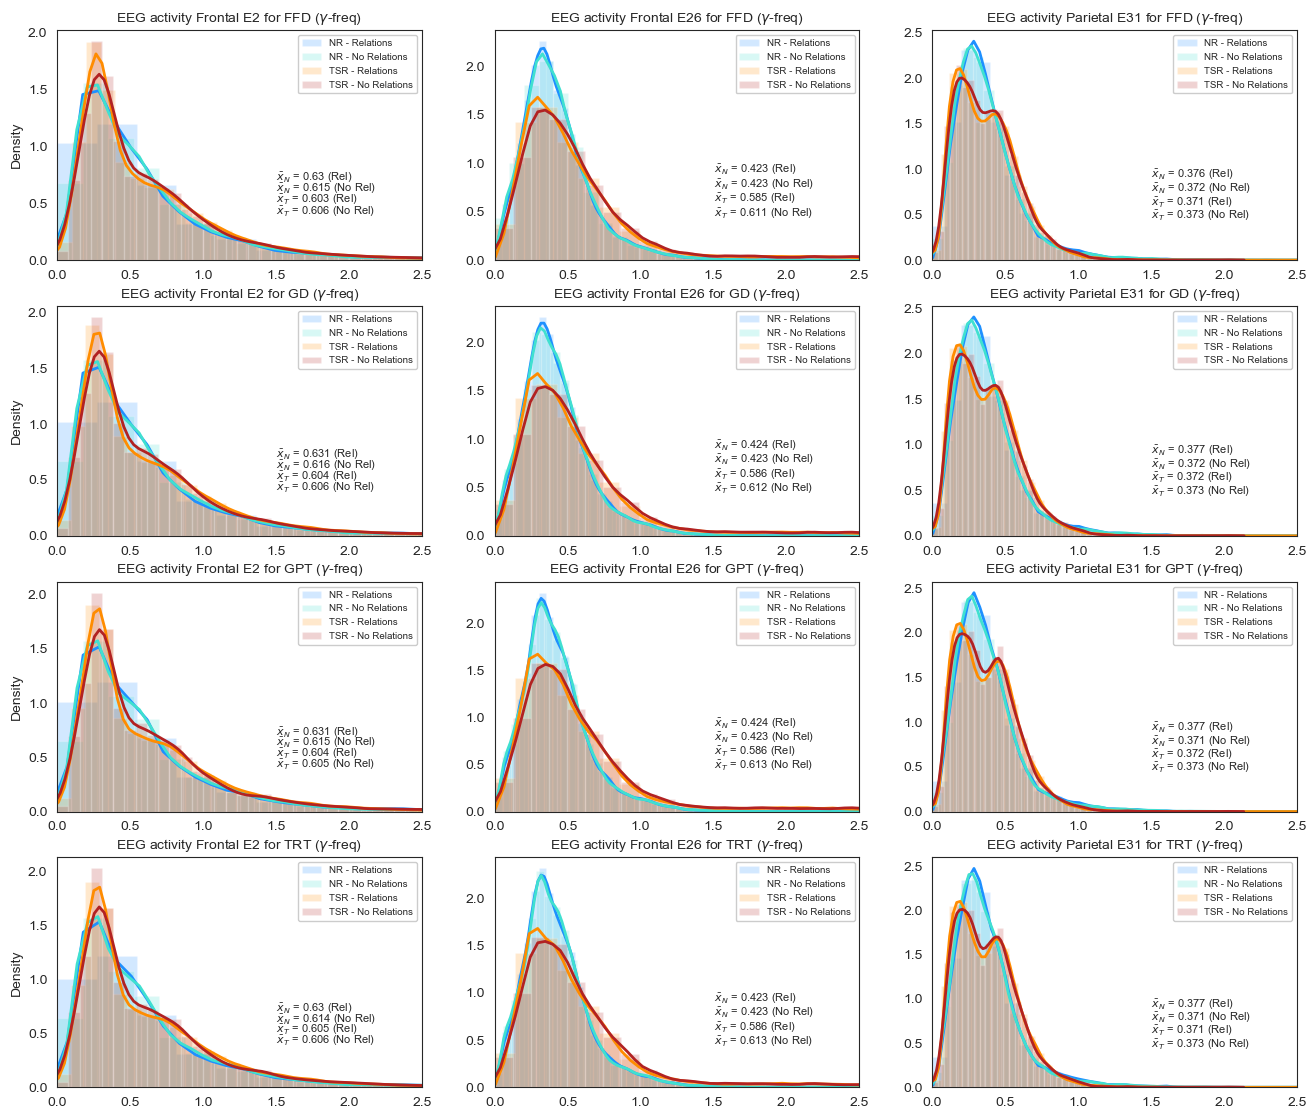

<Figure size 432x288 with 0 Axes>

In [42]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 3, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_gamma_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_gamma_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_gamma_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_gamma_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        pos = [(1.5, 0.9), (1.5, 0.75), (1.5, 0.6), (1.5, 0.45)] if j > 0 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[0], fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[1], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[2], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[3], fontsize=8)
        if j < 2:
            axes[i][j].set_title(r'EEG activity Frontal {} for {} ($\gamma$-freq)'.format(frontoparietal_electrodes_gamma_all[feat], et_features[i]), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Parietal {} for {} ($\gamma$-freq)'.format(frontoparietal_electrodes_gamma_all[feat], et_features[i]), fontsize = 10)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

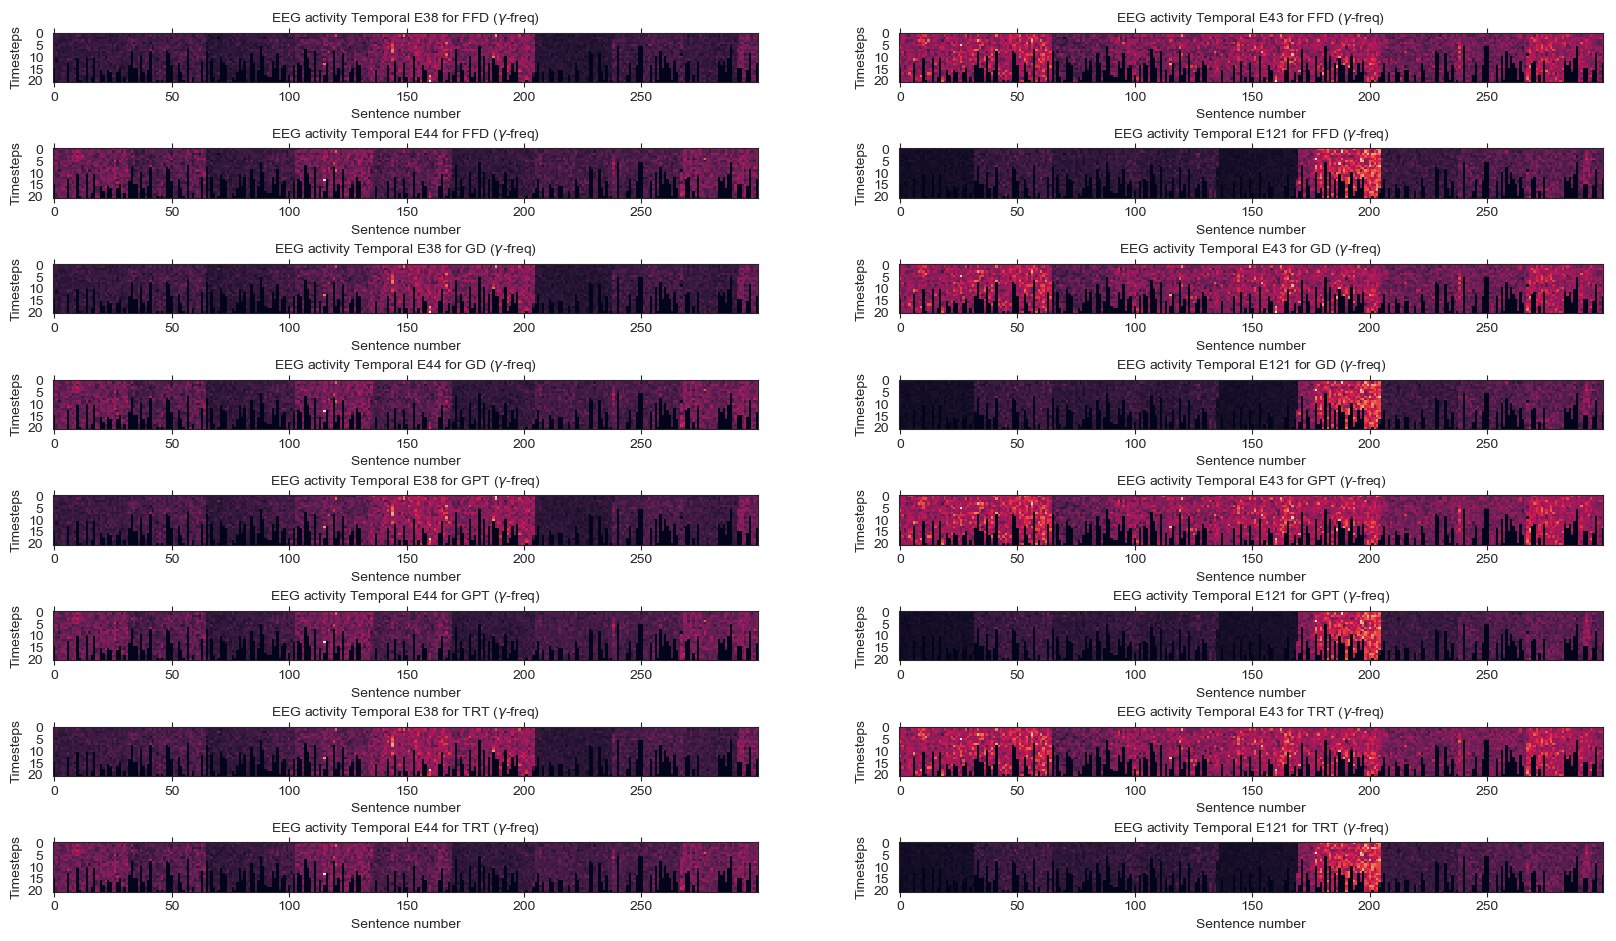

In [43]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(20, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_gamma_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[et_feat_idx]), fontsize=10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/gamma_activity_temporal_heatmap_sbj1_task2')
plt.show()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

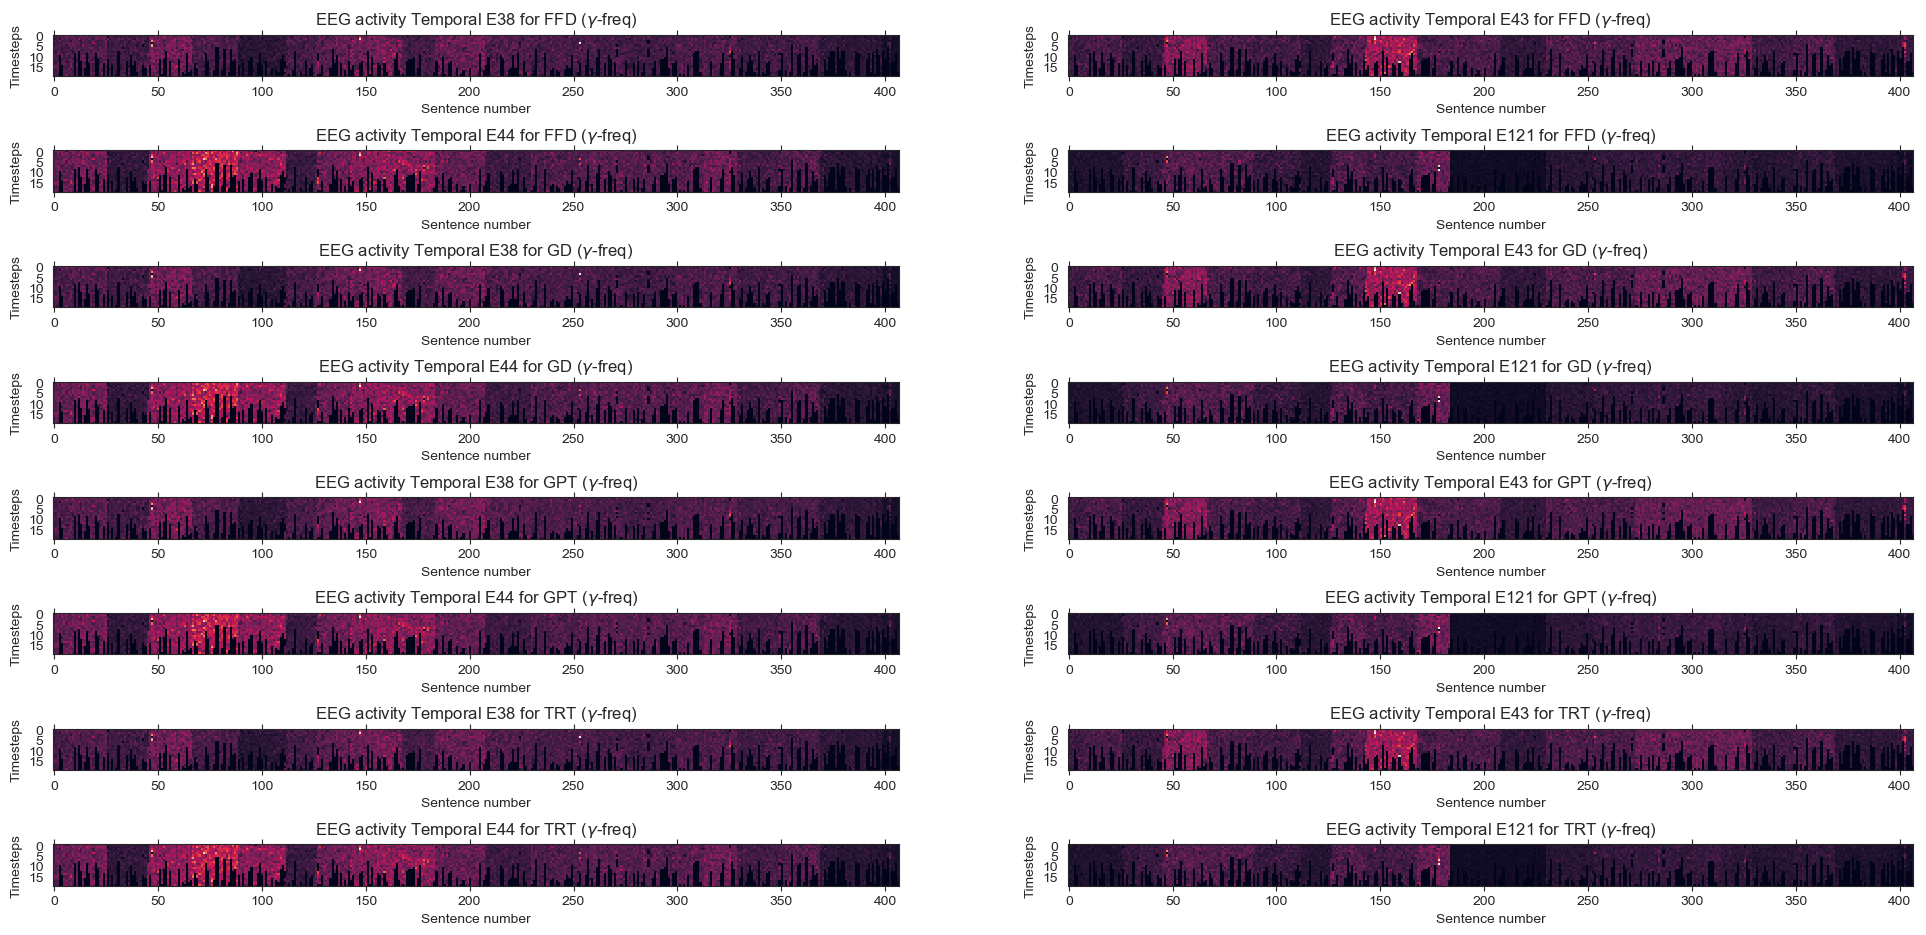

In [44]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(24, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_gamma_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[et_feat_idx]), fontsize=12)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/gamma_activity_temporal_heatmap_sbj1_task3')
plt.show()

## $\theta$-frequency domain

In [45]:
eeg_locs_theta_freqs[1][-1] = 2 # replace for plotting only (!)

In [46]:
## Temporal Cortex ##
temporal_electrodes_theta_all, temporal_indices_theta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_theta_freqs, 
                                                                                           temporal_electrodes_theta, 
                                                                                           k=120)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_theta_all, frontoparietal_indices_theta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_theta_freqs, 
                                                                                           frontoparietal_electrodes_theta, 
                                                                                           k=120)

In [47]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_theta_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_theta_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_theta_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_theta_all[feat]].mean()), (1.8, 0.5))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/theta_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

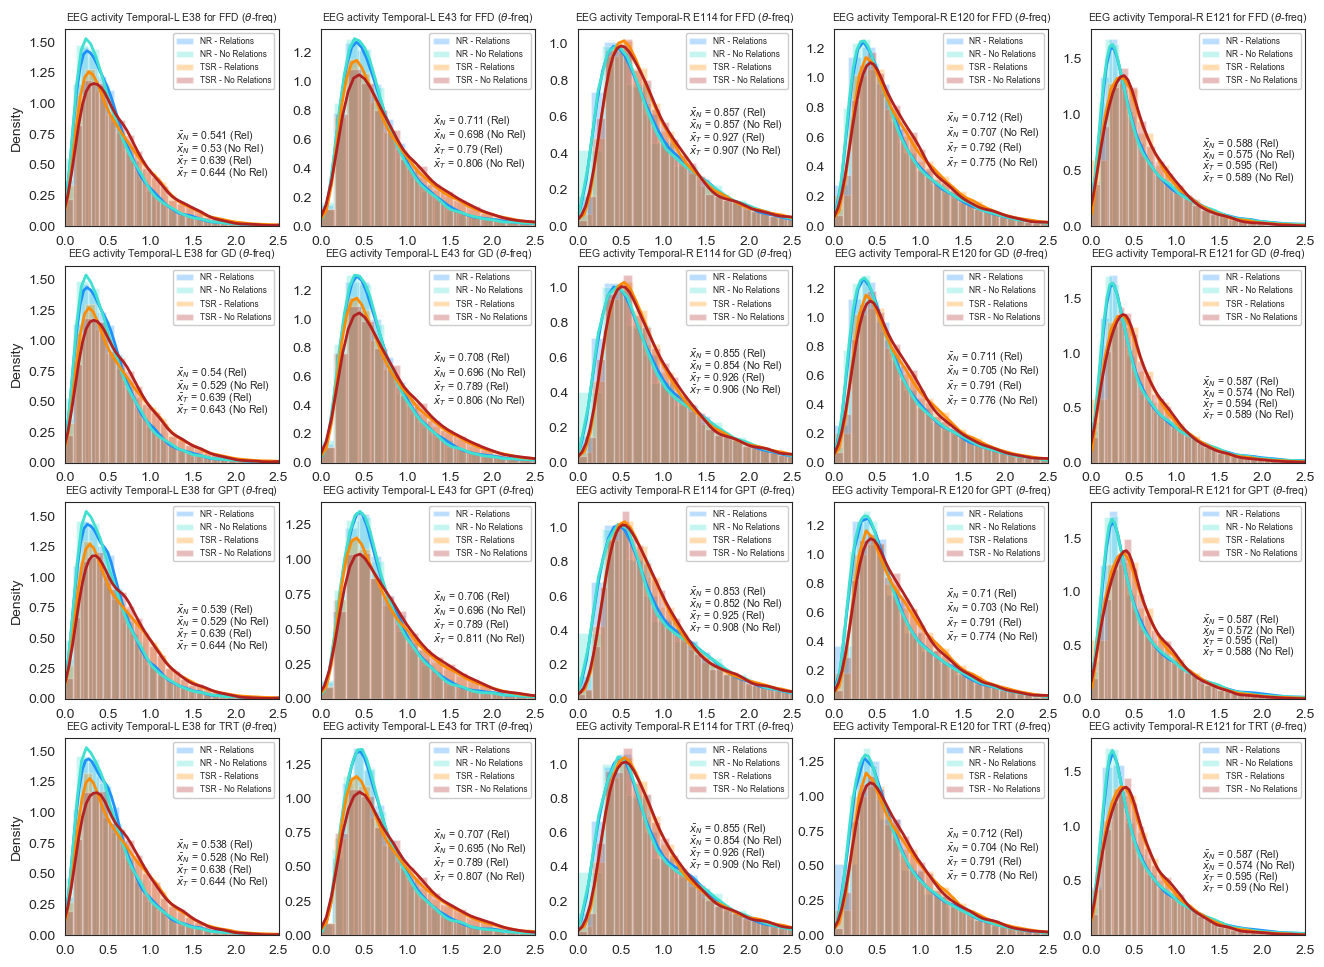

<Figure size 432x288 with 0 Axes>

In [48]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 5, figsize=(16, 12), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_theta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_theta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_theta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_theta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        pos = [(1.3, 0.6), (1.3, 0.53), (1.3, 0.46), (1.3, 0.39)] if j == 2 else [(1.3, 0.7), (1.3, 0.6), (1.3, 0.5), (1.3, 0.4)]
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_theta_all[feat]].mean()), pos[0], fontsize=7.5)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_theta_all[feat]].mean()), pos[1], fontsize=7.5)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_theta_all[feat]].mean()), pos[2], fontsize=7.5)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_theta_all[feat]].mean()), pos[3], fontsize=7.5)
        if j < 2:
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[i]), fontsize=7.5)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[i]), fontsize=7.5)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':6})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

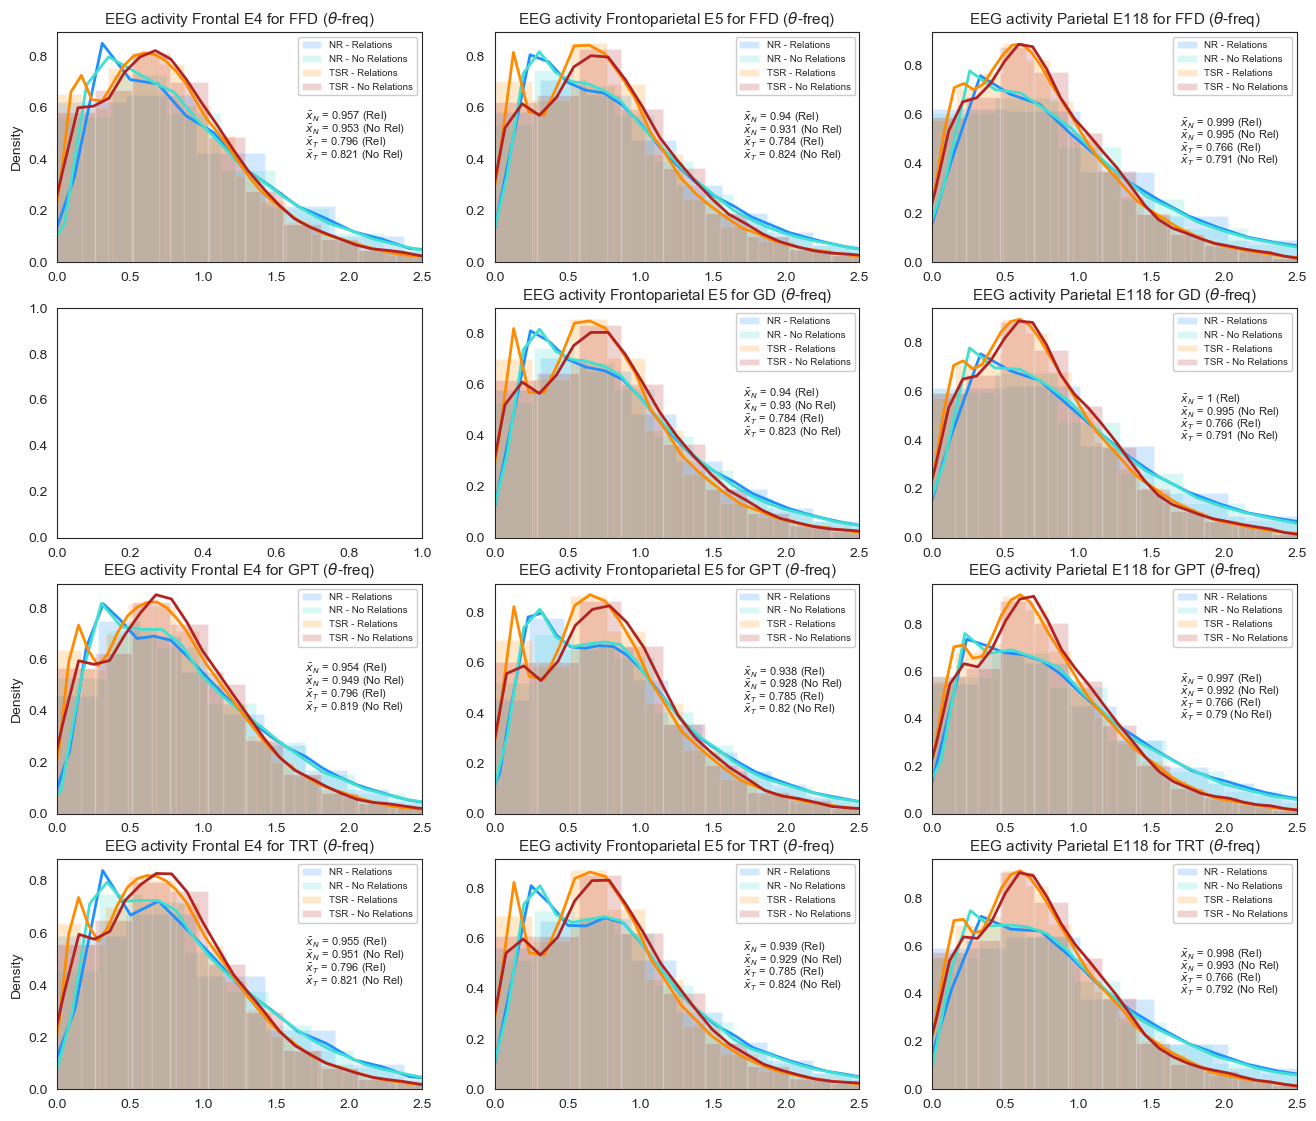

<Figure size 432x288 with 0 Axes>

In [49]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

pos = [(1.7, 0.55), (1.7, 0.5), (1.7, 0.45), (1.7, 0.40)]
feat = 0
fig, axes = plt.subplots(4, 3, figsize=(16, 14), dpi=100)
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        if i == 1 and j == 0:
            feat += 1
            continue
        sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_theta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_theta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_theta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_theta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[0], fontsize=8)
        axes[i][j].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[1], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[2], fontsize=8)
        axes[i][j].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[3], fontsize=8)
        if j == 0:
            axes[i][j].set_title(r'EEG activity Frontal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_features[i]), fontsize = 11)
        elif j == 1:
            axes[i][j].set_title(r'EEG activity Frontoparietal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_features[i]), fontsize = 11)
        else:
            axes[i][j].set_title(r'EEG activity Parietal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_features[i]), fontsize = 11)
        if j == 0: axes[i][j].set_ylabel(r'Density')
        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
        axes[i][j].set_xlim(0, 2.5)
        feat += 1
#plt.savefig('plots/theta_activity_frontoparietal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

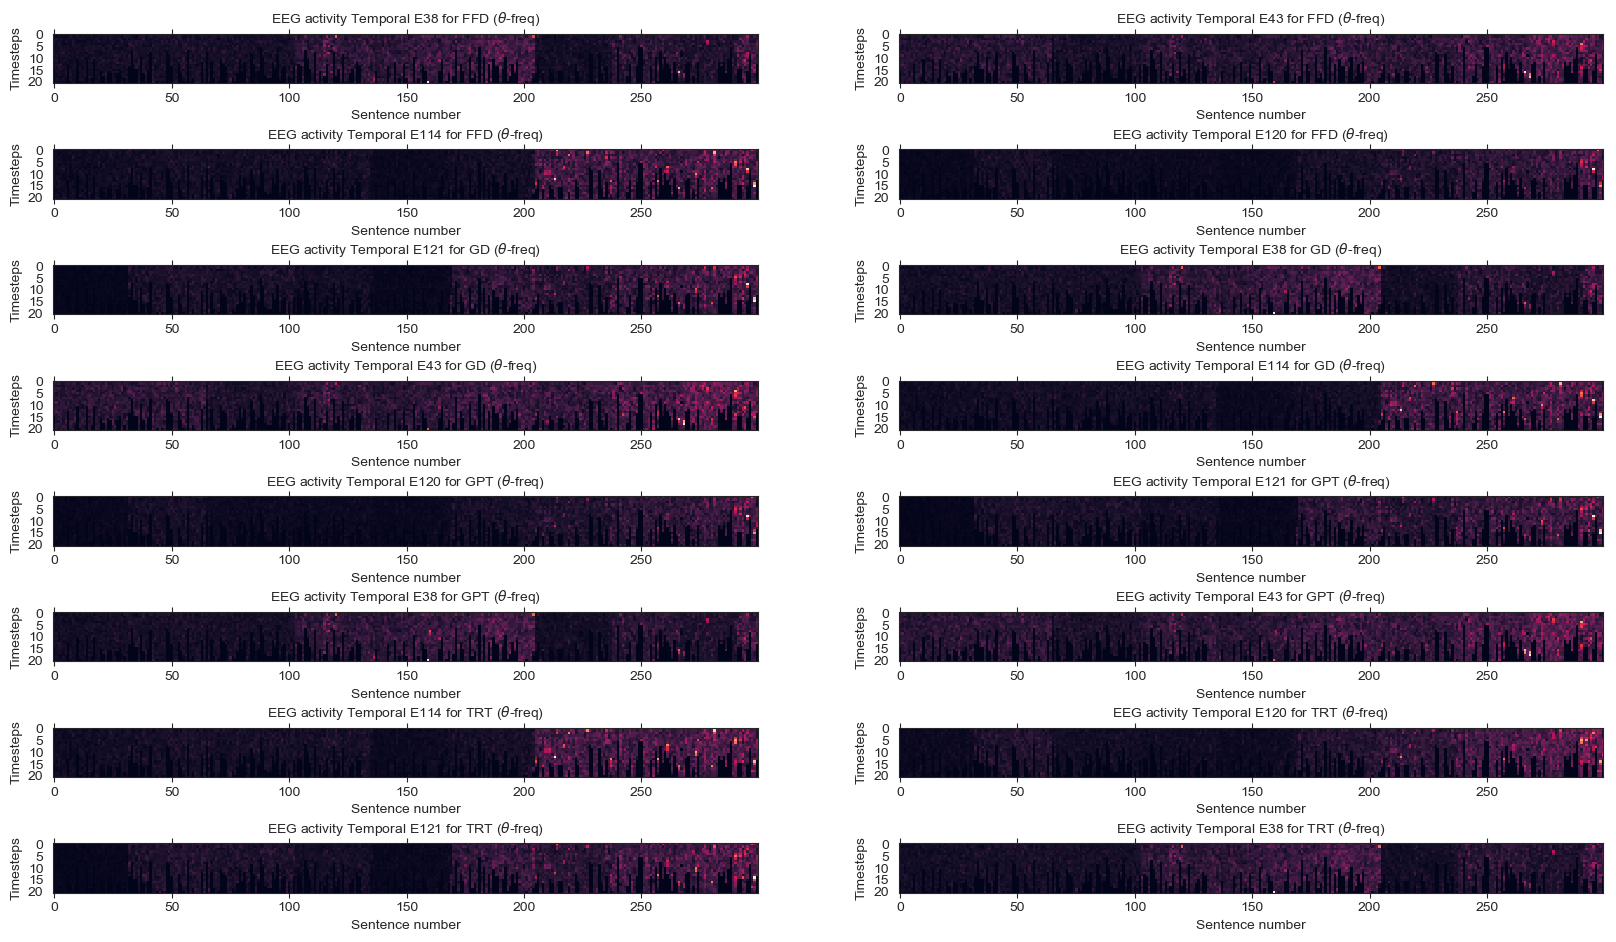

In [50]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(20, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_theta_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[et_feat_idx]), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/theta_activity_temporal_heatmap_sbj1_task2')
plt.show()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

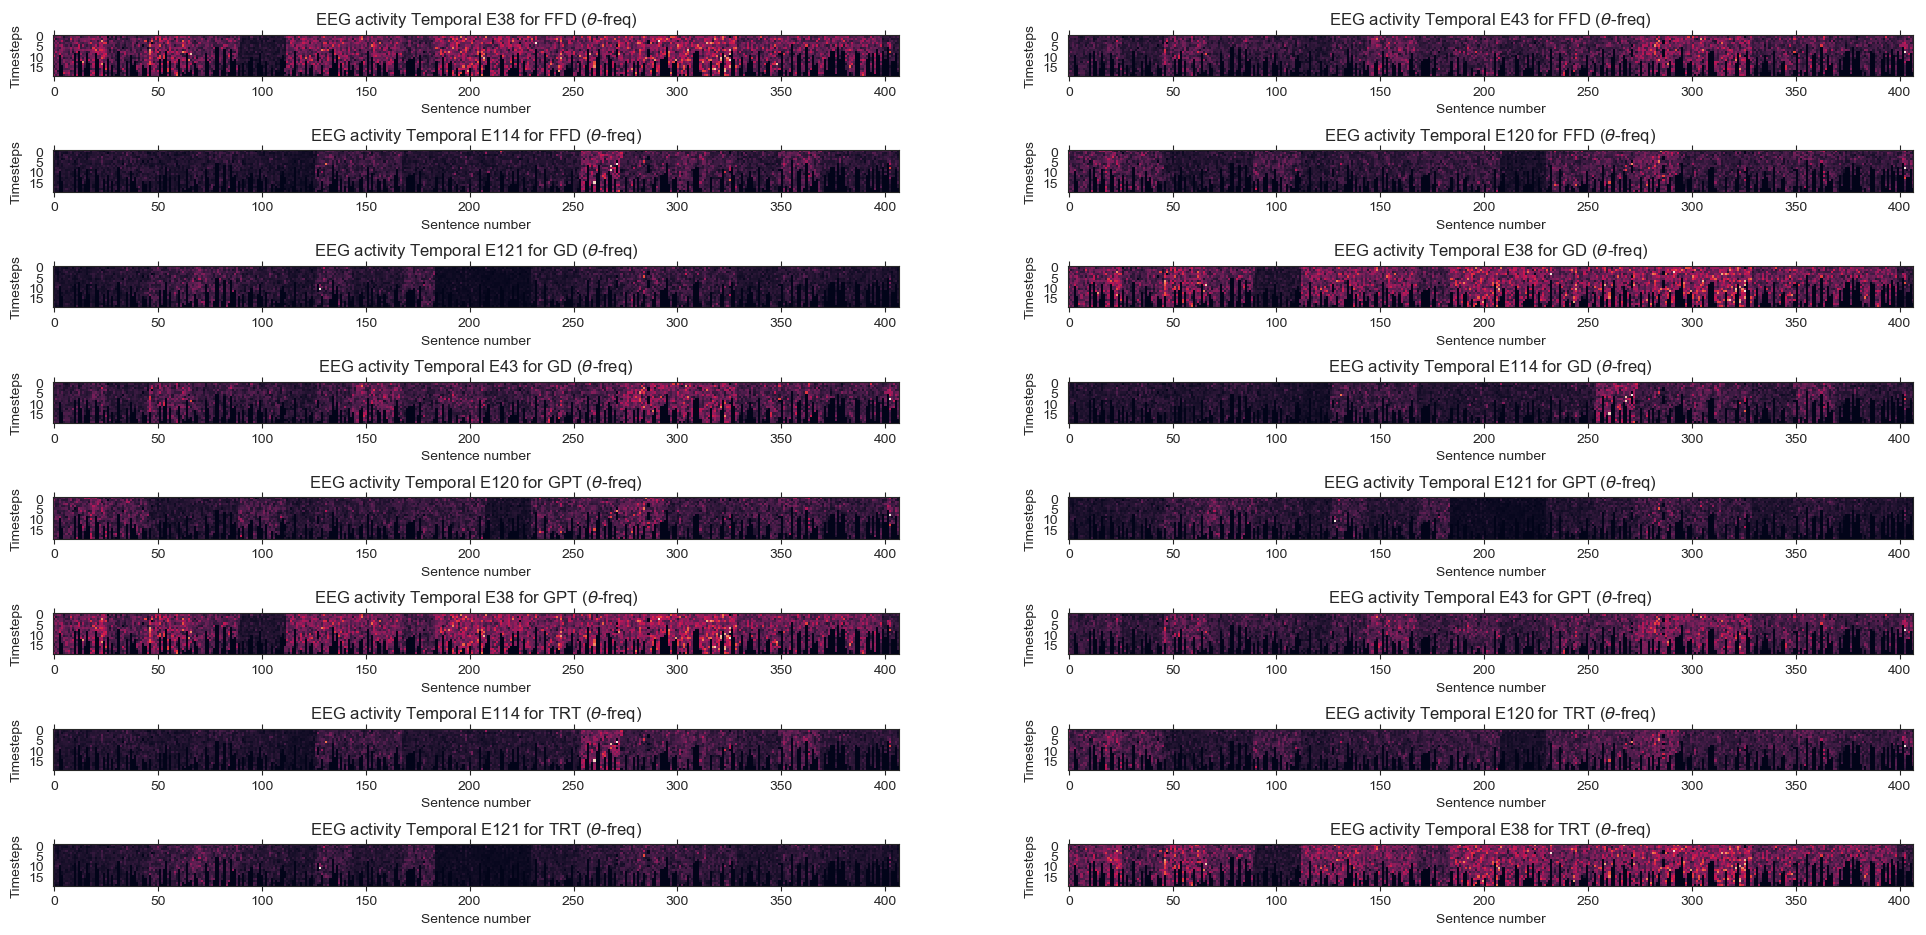

In [51]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(24, 12), dpi=100)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_theta_all[feat])).T)
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[et_feat_idx]), fontsize=12)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/theta_activity_temporal_heatmap_sbj1_task3')
plt.show()